In [1]:
using CoolProp

In [2]:
using Interpolations

In [3]:
using Plots
gr()

Plots.GRBackend()

In [4]:
fluid_type = "Butane"

"Butane"

In [40]:
d = 1e-3

0.001

In [6]:
Tᵥ = 295.0

295.0

In [32]:
ρₗ  = CoolProp.PropsSI("D","T",Tᵥ,"Q",0.0,fluid_type)

576.4727745885054

In [33]:
ρᵥ  = CoolProp.PropsSI("D","T",Tᵥ,"Q",1.0,fluid_type)

5.619013384142316

In [7]:
hₗ = CoolProp.PropsSI("H","T",Tᵥ,"Q",0.0,fluid_type)

251784.93076619998

In [8]:
hᵥ = CoolProp.PropsSI("H","T",Tᵥ,"Q",1.0,fluid_type)

616444.5004460975

In [9]:
Cpₗ = CoolProp.PropsSI("CPMASS","T",Tᵥ,"Q",0.0,fluid_type)

2423.00871631122

In [10]:
Cpᵥ = CoolProp.PropsSI("CPMASS","T",Tᵥ,"Q",1.0,fluid_type)

1777.4588672805596

In [11]:
μₗ = CoolProp.PropsSI("V","T",Tᵥ,"Q",0.0,fluid_type)

0.00016322746825352366

In [12]:
μᵥ = CoolProp.PropsSI("V","T",Tᵥ,"Q",1.0,fluid_type)

7.308457480329653e-6

In [13]:
kₗ = CoolProp.PropsSI("CONDUCTIVITY","T",Tᵥ,"Q",0.0,fluid_type)

0.10602468282359685

In [14]:
kᵥ = CoolProp.PropsSI("CONDUCTIVITY","T",Tᵥ,"Q",1.0,fluid_type)

0.016272671857647733

In [15]:
Prₗ = CoolProp.PropsSI("PRANDTL","T",Tᵥ,"Q",0.0,fluid_type)

3.7302783445033603

In [16]:
Prᵥ = CoolProp.PropsSI("PRANDTL","T",Tᵥ,"Q",1.0,fluid_type)

0.7983005291444925

In [17]:
σ = CoolProp.PropsSI("I","T",Tᵥ,"Q",0.0,fluid_type)

0.012279469759138965

In [18]:
kₗ/(Cpₗ*μₗ)*6.56e-3^2

1.153629730162385e-5

In [19]:
Dₗ = CoolProp.PropsSI("D","T",Tᵥ,"Q",0.0,fluid_type)

576.4727745885054

In [20]:
Dᵥ = CoolProp.PropsSI("D","T",Tᵥ,"Q",1.0,fluid_type)

5.619013384142316

In [21]:
P = CoolProp.PropsSI("P","T",Tᵥ,"Q",0.0,fluid_type)

220337.19644977106

In [22]:
R = CoolProp.PropsSI("GAS_CONSTANT","T",Tᵥ,"Q",1.0,fluid_type)

8.314472

In [23]:
M = CoolProp.PropsSI("M","T",Tᵥ,"Q",1.0,fluid_type)

0.0581222

In [24]:
Rkg = R/M

143.0515706563069

In [41]:
Rin = d/2
δ = 1e-5

1.0e-5

In [42]:
Rn = 1e-7:1e-7:1e-5

1.0e-7:1.0e-7:1.0e-5

In [43]:
y = Rkg .* Tᵥ ./ (hᵥ-hₗ) .* log.(1 .+ 2 .* σ ./ P .* (1 ./ Rn .- 1/2(Rin-δ)))

100-element Array{Float64,1}:
 0.08665661001782884
 0.05125259148910966
 0.03655151069516906
 0.028435619700334265
 0.02327802774061473
 0.019707336845960717
 0.01708765933402458
 0.015083235116959548
 0.013499876251890324
 0.012217403996065372
 0.011157433233780866
 0.010266646989204913
 0.00950751192109428
 ⋮
 0.0014273015610562184
 0.0014113945071353728
 0.0013958349435485079
 0.0013806116067702505
 0.0013657137148710386
 0.0013511309420492527
 0.0013368533947631376
 0.0013228715893454208
 0.0013091764309952
 0.0012957591940487483
 0.0012826115034392754
 0.0012697253172632935

In [44]:
ΔTᵥ = Tᵥ .* (1 ./ (1 .- y) .- 1)

100-element Array{Float64,1}:
 27.989144319266945
 15.936290685650711
 11.191771822544503
  8.634021565314365
  7.030678512940929
  5.930539509347388
  5.128493452551231
  4.51769582786162
  4.036961981491338
  3.6487119670055126
  3.3285812267662274
  3.0600775982765316
  2.8316378473123605
  ⋮
  0.4216557904795448
  0.41694986034757964
  0.4123468765259686
  0.4078434974635736
  0.4034365246817795
  0.39912289519793975
  0.39489967442542406
  0.3907640495161391
  0.3867133231117237
  0.3827449074772171
  0.37885631898746164
  0.37504517294390305

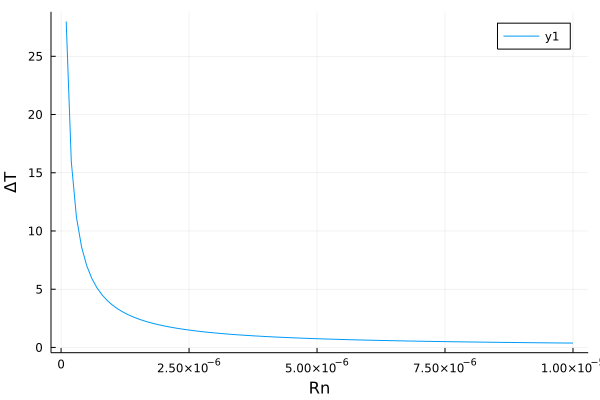

In [45]:
plot(Rn,ΔTᵥ,ylabel="ΔT",xlabel="Rn")

In [46]:
t_to_nondi_t = μₗ/ρₗ/(d^2)

0.2831486159429433

In [48]:
μₗ

0.00016322746825352366